In [120]:
#import the libraries
import pandas as pd
import numpy as np
import random 
import operator
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal #for generating pdf

In [121]:
#import the dataset
data = pd.read_csv('student-mat.csv', delimiter=";", usecols=['romantic', 'G1', 'G2', 'sex'])

#get 2 kind of category
yes_romantic = data.loc[data['romantic'].isin(['yes'])].reset_index().copy()
no_romantic = data.loc[data['romantic'].isin(['no'])].reset_index().copy()

In [122]:
yes_romantic.head()

,index,sex,romantic,G1,G2
0,3,F,yes,15,14
1,14,M,yes,14,16
2,29,M,yes,10,12
3,32,M,yes,17,16
4,37,M,yes,15,16


In [123]:
yes_romantic.shape

(132, 5)

In [124]:
columns = list(yes_romantic.columns)
features = columns[:]
#class_labels
df = yes_romantic[features]

In [125]:
#number of clusters
k = 4
#maximum number of iterations
MAX_ITER = 100
#number of data points
n = len(df)
#Fuzzy parameter
m = 1.7
#Epsilon
eps = 0.0000001

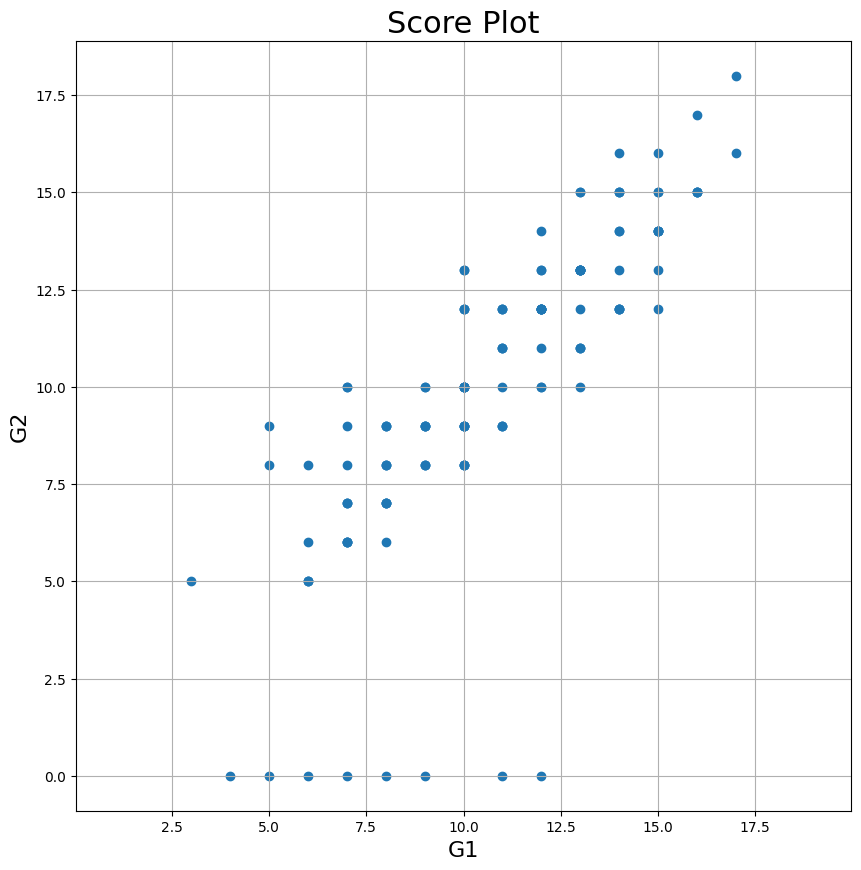

In [126]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.iloc[:,3]), list(df.iloc[:,4]), marker='o')
plt.axis('equal')
plt.xlabel('G1', fontsize=16)
plt.ylabel('G2', fontsize=16)
plt.title('Score Plot', fontsize=22)
plt.grid()
plt.show()

In [127]:
def initializeMembershipMatrix():
  membership_mat = []
  for i in range(n):
    random_num_list = [random.random() for i in range(k)]
    summation = sum(random_num_list)
    temp_list = [x/summation for x in random_num_list]
    flag = temp_list.index(max(temp_list))
    for j in range(0, len(temp_list)):
      if (j == flag):
        temp_list[j] = 1
      else:
        temp_list[j] = 0

    membership_mat.append(temp_list)
  return membership_mat

In [128]:
def calculateClusterCenter(membership_mat):
  cluster_mem_val = list(zip(*membership_mat))
  cluster_centers = []
  for j in range(k):
    x = list(cluster_mem_val[j])
    xraised = [p ** m for p in x]
    denominator = sum(xraised)
    temp_num = []
    for i in range(n):
      data_point = list(df[['G1', 'G2']].iloc[i])
      prod = [xraised[i] * val for val in data_point]
      temp_num.append(prod)
    numerator = map(sum, list(zip(*temp_num)))
    center = [z/denominator for z in numerator]
    cluster_centers.append(center)
  return cluster_centers

In [129]:
def updateMembershipValue(membership_mat, cluster_centers):
  p = float(2/(m-1))
  for i in range(n):
    x = list(df[['G1', 'G2']].iloc[i])
    distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
    for j in range(k):
      den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
      membership_mat[i][j] = float(1/den)
  return membership_mat

In [130]:
def getClusters(membership_mat):
  cluster_labels = list()
  for i in range(n):
    max_val, idx = max((val,idx) for (idx, val) in enumerate(membership_mat[i]))
    cluster_labels.append(idx)
  return cluster_labels

In [131]:
def fuzzyCMeansClustering1(): #First Iteration with centers at 0
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    cent_temp = [[0, 0],[0, 0],[0, 0],[0, 0]]
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    return cluster_labels, cluster_centers, acc

In [132]:
def fuzzyCMeansClustering2(): #Second Iteration Multivariate Gaussian
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    mean = [0, 0]
    cov = [[1, 0], [0, 1]]
    
    lis1,cent_temp=[],[]
    
    for i in range(0,k):
        Z = list(np.random.multivariate_normal(mean, cov))
        Z1 = list(np.random.multivariate_normal(mean, cov))
        lis1 = Z+Z1
        cent_temp.append(lis1)
    
    
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    return cluster_labels, cluster_centers, acc

In [133]:
def fuzzyCMeansClustering3(): 
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        curr += 1
    return cluster_labels, cluster_centers, acc

In [134]:
def fuzzyCMeansClustering4(): 
    membership_mat = initializeMembershipMatrix()
    while True:
        cluster_centers = calculateClusterCenter(membership_mat)
        new_membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        for i in range(n):
          diff_sum += sum(abs(np.subtract(membership_mat[i], new_membership_mat[i])))
        if diff_sum < eps:
          cluster_labels = getClusters(membership_mat)
          break;
        else:
          membership_mat = new_membership_mat
    return cluster_labels, cluster_centers

In [135]:
labels, centers, acc = fuzzyCMeansClustering3()

In [136]:
centers

[[14.582550193684543, 14.389784835317062],
 [11.320071859433982, 11.156236793680312],
 [7.790174787542223, 7.7230890380264],
 [7.418213935880746, 0.31728814007770245]]

In [161]:
#finding mode
seto = 0
vers = 1
virg = 2
blas = 3
clusters = [i for i in range(k)]

[0, 1, 2, 3]

In [163]:
#sepal
s_mean_clus1 = np.array([centers[seto][0],centers[seto][1]])
s_mean_clus2 = np.array([centers[vers][0],centers[vers][1]])
s_mean_clus3 = np.array([centers[virg][0],centers[virg][1]])
s_mean_clus4 = np.array([centers[blas][0],centers[blas][1]])
s_mean_clusters = [np.array([centers[i][0],centers[i][1]]) for i in range(k)]
#here

array([14.58255019, 14.38978484])

In [151]:
values = np.array(labels) #label

searchval_seto = seto
searchval_vers = vers
searchval_virg = virg
searchval_blas = blas

ii_seto = np.where(values == searchval_seto)[0]
ii_vers = np.where(values == searchval_vers)[0]
ii_virg = np.where(values == searchval_virg)[0]
ii_blas = np.where(values == searchval_blas)[0]
ind_seto = list(ii_seto)
ind_vers = list(ii_vers)
ind_virg = list(ii_virg)
ind_blas = list(ii_blas)

In [152]:
yes_df = yes_romantic.iloc[:,3:5]

In [154]:
seto_df = yes_df[yes_df.index.isin(ind_seto)]
vers_df = yes_df[yes_df.index.isin(ind_vers)]
virg_df = yes_df[yes_df.index.isin(ind_virg)]
blas_df = yes_df[yes_df.index.isin(ind_blas)]
np.transpose(np.array(blas_df))

array([[12,  8,  9, 11,  4,  5,  7,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [156]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))
cov_blas = np.cov(np.transpose(np.array(blas_df)))

In [157]:
yes_df = np.array(yes_df)
x1 = np.linspace(-2,20,1000)  
x2 = np.linspace(-2,20,1000)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(s_mean_clus1, cov_seto)  
Z2 = multivariate_normal(s_mean_clus2, cov_vers)
Z3 = multivariate_normal(s_mean_clus3, cov_virg)
Z4 = multivariate_normal(s_mean_clus4, cov_blas)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(yes_df[:,0], yes_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.contour(X, Y, Z4.pdf(pos), colors="k" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('G1', fontsize=16)                                                  # X-Axis
plt.ylabel('G2', fontsize=16)                                                  # Y-Axis
plt.title('Final Clusters(Score)', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.